# MINSOC - Find IT
1.   A.A Muhammad Itqany Rachman
2.   Muhammad Ariq Farhan
3.   Reynaldi Holtrop

## Metadata

Features : 
- h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent.
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

Target Labels :
- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes.
Some respondents didn't get either vaccine, others got only one, and some got both.
This is formulated as a multilabel (and not multiclass) problem.

## Data Understanding

### Read File & Info Data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/dac-find-it-2023/training_set_features.csv', index_col='respondent_id')
train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [ ]:
test = pd.read_csv('/content/gdrive/My Drive/dac-find-it-2023/test_set_features.csv', index_col='respondent_id')

In [ ]:
labels = pd.read_csv('/content/gdrive/My Drive/dac-find-it-2023/training_set_labels.csv', index_col='respondent_id')

### Menggabungkan data Train dan Labels

In [ ]:
# labels.drop('respondent_id', axis=1, inplace = True)

In [ ]:
# df = train.join(labels)
# df

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
train.describe(include='O')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [ ]:
df_null = train.isna().sum()
df_null

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [ ]:
# cek duplikasi data
df_duplicate = train.duplicated().sum()
df_duplicate

0

## Data Cleaning

### Drop Columns

- Karena hhs_geo_region, employment_industry, employment_occupation merupakan string acak semua yang kurang berpengaruh dalam analisis, maka akan kami drop.

In [ ]:
drop_df = train.copy()

In [ ]:
# drop_df.drop(['hhs_geo_region', 'employment_industry', 'employment_occupation'], axis = 1, inplace = True)
drop_df.drop(['health_insurance', 'employment_industry', 'employment_occupation'], axis = 1, inplace = True)

### Klasifikasi colomn yang bertipe kategori


In [ ]:
cat_cols = drop_df.select_dtypes(include='object').columns
drop_df[cat_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"


Dikarenakan dalam data tersebut banyak yang null, maka semuanya akan diisi dengan nilai modus setiap kolom. Hal ini dikarenakan semua kolom bertipe kategorikal serta yang numerikal hanya memiliki uique value yang sedikit

In [ ]:
for col in drop_df.columns:
    if drop_df[col].isnull().sum() and drop_df[col].dtypes != 'object':
        drop_df[col].loc[(drop_df[col].isnull())] = drop_df[col].mean()
for col in drop_df.columns:
    if drop_df[col].isnull().sum() and drop_df[col].dtypes == 'object':
        drop_df[col].loc[(drop_df[col].isnull())] = drop_df[col].mode().max()

<ipython-input-172-726fa432a3eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df[col].loc[(drop_df[col].isnull())] = drop_df[col].mean()
<ipython-input-172-726fa432a3eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df[col].loc[(drop_df[col].isnull())] = drop_df[col].mode().max()
<ipython-input-172-726fa432a3eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df[col].loc[(drop_df[col].isnull())] = drop_df[col].mo

In [ ]:
# Cek data apakah masih ada yang null
clean_df = drop_df
clean_df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

### Deteksi Outliers

In [ ]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26707.0,1.618486,0.908741,0.0,1.0,2.0,2.000000,3.0
h1n1_knowledge,26707.0,1.262532,0.616805,0.0,1.0,1.0,2.000000,2.0
behavioral_antiviral_meds,26707.0,0.048844,0.215258,0.0,0.0,0.0,0.000000,1.0
behavioral_avoidance,26707.0,0.725612,0.444473,0.0,0.0,1.0,1.000000,1.0
behavioral_face_mask,26707.0,0.068982,0.253339,0.0,0.0,0.0,0.000000,1.0
behavioral_wash_hands,26707.0,0.825614,0.379150,0.0,1.0,1.0,1.000000,1.0
behavioral_large_gatherings,26707.0,0.358640,0.478828,0.0,0.0,0.0,1.000000,1.0
behavioral_outside_home,26707.0,0.337315,0.472076,0.0,0.0,0.0,1.000000,1.0
behavioral_touch_face,26707.0,0.677264,0.466410,0.0,0.0,1.0,1.000000,1.0
doctor_recc_h1n1,26707.0,0.220312,0.397351,0.0,0.0,0.0,0.220312,1.0


## Data Exploratory

### Pengecekan imbalanced pada target labels

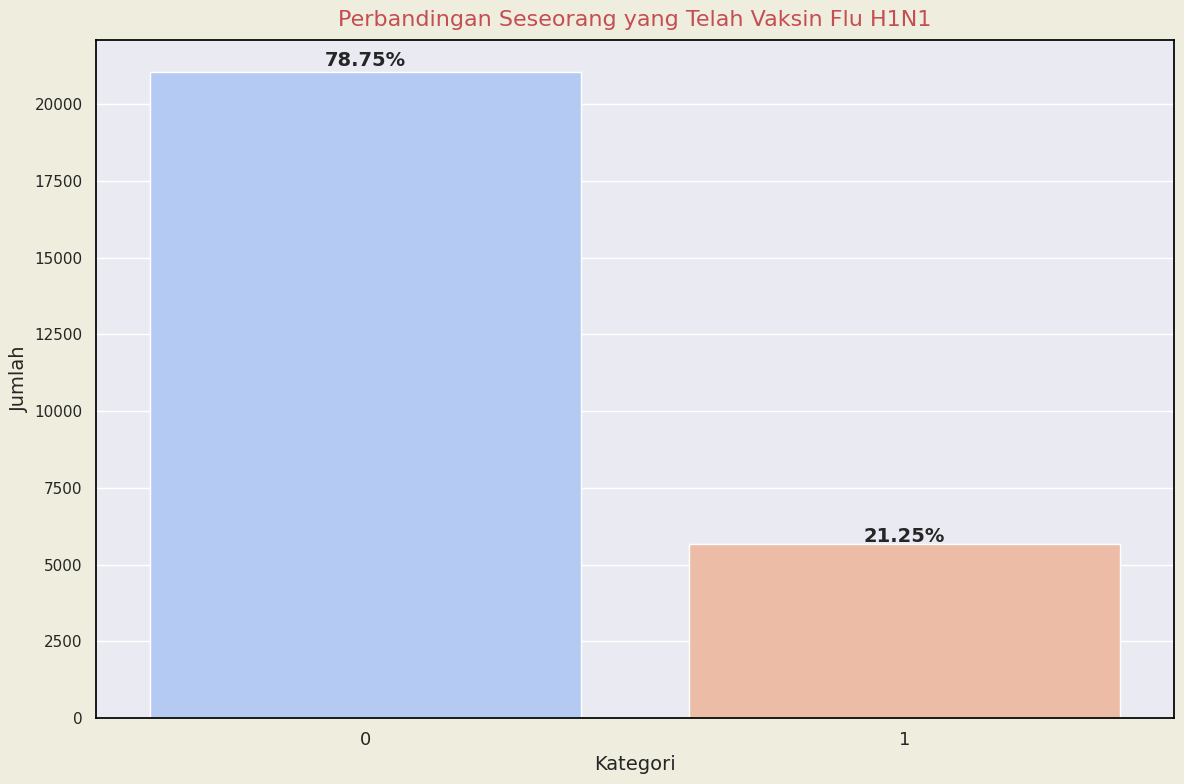

In [ ]:
# Menampilkan visualisasi terkait perbandingan seseorang yang telah vaksin flu h1n1 atau belum
sns.set(rc={'figure.facecolor':'#EEEDDE','axes.edgecolor':'black'})
fig, ax = plt.subplots(1,figsize=(12,8))
sns.countplot(x = labels['h1n1_vaccine'],palette='coolwarm',ax=ax)
ax.set_title('Perbandingan Seseorang yang Telah Vaksin Flu H1N1',pad=10,fontsize=16,c='r')
ax.set_xlabel('Kategori',fontsize=14)
ax.set_ylabel('Jumlah',fontsize=14)
ax.set_xticklabels(labels.h1n1_vaccine.unique(),fontsize=13)
for i, value in enumerate(labels.h1n1_vaccine.value_counts()):
    ax.text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=14,weight='semibold',ha='center')
fig.tight_layout()
plt.show()

Dapat dilihat dari visualisasi diatas bahwa kolom tersebut memiliki data yang imbalanced, yang nantinya akan kita lakukan oversample/undersample

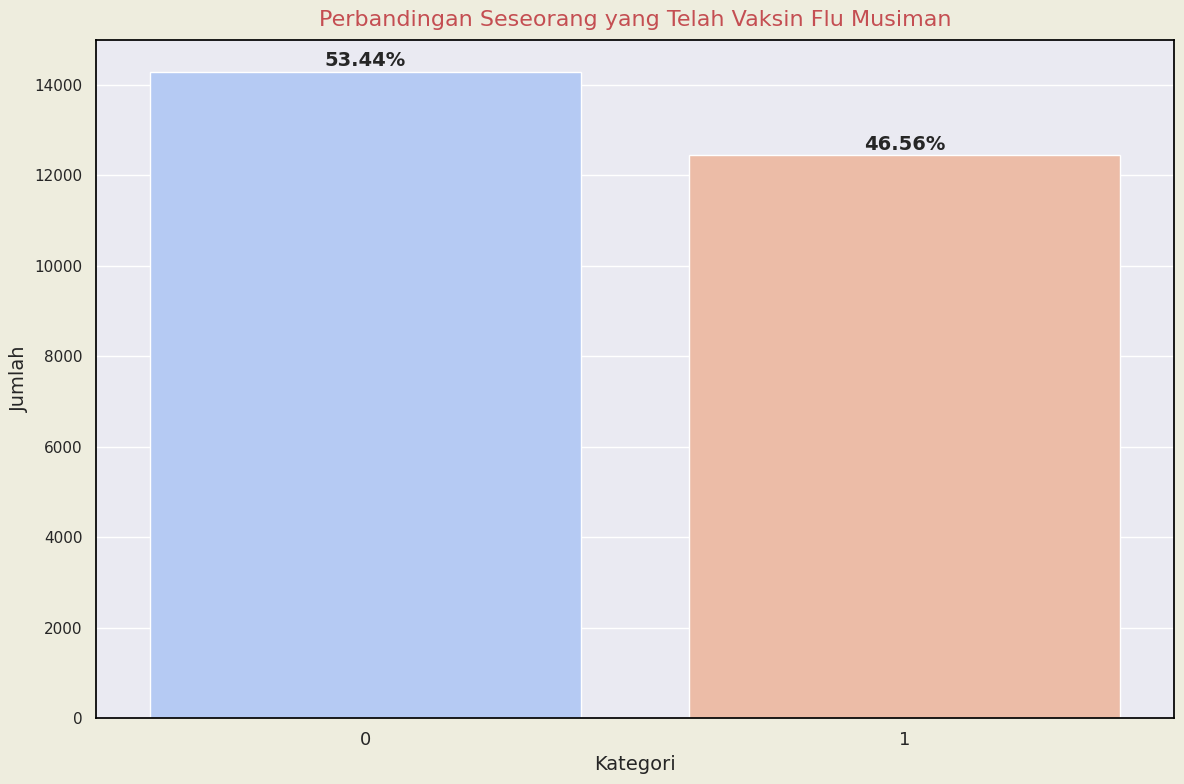

In [ ]:
# Menampilkan visualisasi terkait perbandingan seseorang yang telah vaksin flu seasonal atau belum
sns.set(rc={'figure.facecolor':'#EEEDDE','axes.edgecolor':'black'})
fig, ax = plt.subplots(1,figsize=(12,8))
sns.countplot(x = labels['seasonal_vaccine'],palette='coolwarm',ax=ax)
ax.set_title('Perbandingan Seseorang yang Telah Vaksin Flu Musiman',pad=10,fontsize=16,c='r')
ax.set_xlabel('Kategori',fontsize=14)
ax.set_ylabel('Jumlah',fontsize=14)
ax.set_xticklabels(labels.seasonal_vaccine.unique(),fontsize=13)
for i, value in enumerate(labels.seasonal_vaccine.value_counts()):
    ax.text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=14,weight='semibold',ha='center')
fig.tight_layout()
plt.show()

Data pada kolom seasonal memiliki sifat yang sedikit imbalanced

### Plotting Distribusi Columns

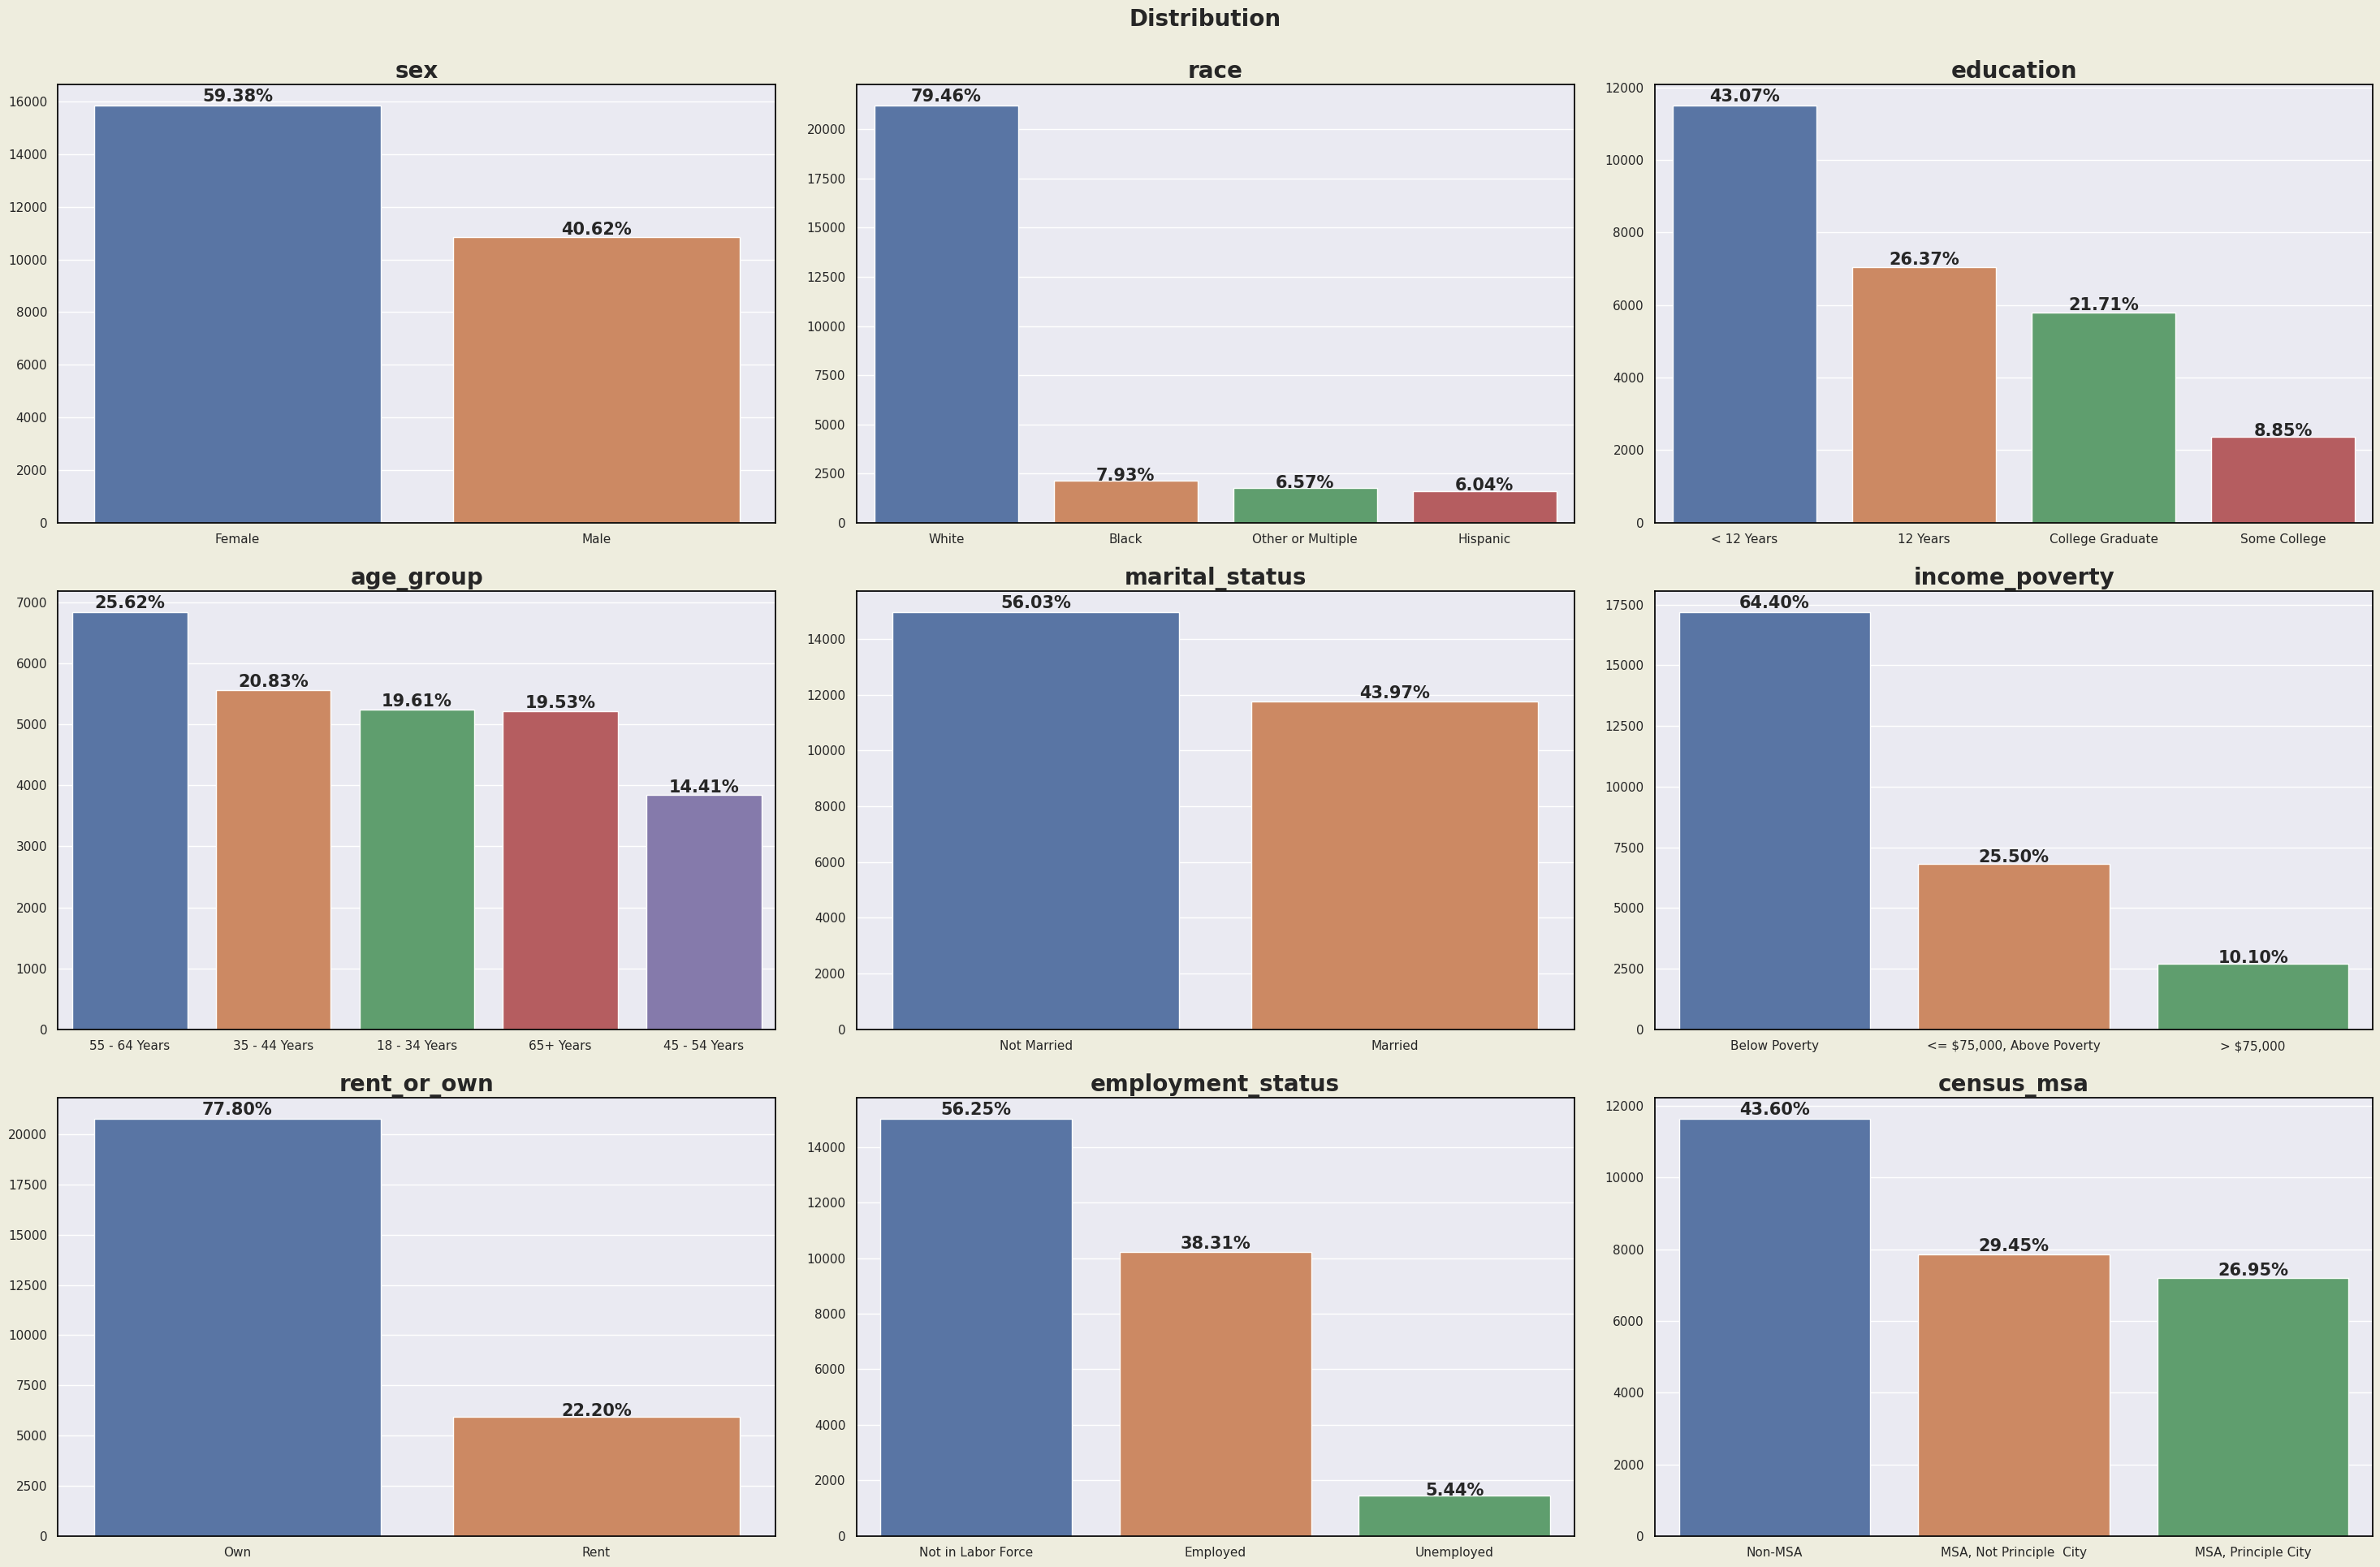

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(30,20))
fig.suptitle('Distribution',fontsize=20,weight='bold')
fig.tight_layout(pad=3)

#plot jenis kelamin
sns.barplot(x=clean_df['sex'].unique(),y=clean_df['sex'].value_counts(),ax=ax[0,0]).set_ylabel('')
ax[0,0].set_title('sex',weight='bold',fontsize=20)   
for i, value in enumerate(clean_df.sex.value_counts()):
    ax[0,0].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')

#plot ras
sns.barplot(x=clean_df['race'].unique(),y=clean_df['race'].value_counts(),ax=ax[0,1]).set_ylabel('')
ax[0,1].set_title('race',weight='bold',fontsize=20)
for i, value in enumerate(clean_df['race'].value_counts()):
    ax[0,1].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')

#plot tingkat pendidikan
sns.barplot(x=clean_df['education'].unique(),y=clean_df['education'].value_counts(),ax=ax[0,2]).set_ylabel('')
ax[0,2].set_title('education',weight='bold',fontsize=20)
for i, value in enumerate(clean_df['education'].value_counts()):
    ax[0,2].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')
    
#plot kelompok umur
sns.barplot(x=clean_df['age_group'].unique(),y=clean_df['age_group'].value_counts(),ax=ax[1,0]).set_ylabel('')
ax[1,0].set_title('age_group',weight='bold',fontsize=20)
for i, value in enumerate(clean_df.age_group.value_counts()):
    ax[1,0].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')

#plot status perkawinan
sns.barplot(x=clean_df['marital_status'].unique(),y=clean_df['marital_status'].value_counts(),ax=ax[1,1]).set_ylabel('')
ax[1,1].set_title('marital_status',weight='bold',fontsize=20)
for i, value in enumerate(clean_df.marital_status.value_counts()):
    ax[1,1].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')

#plot pendapatan tahunan
sns.barplot(x=clean_df['income_poverty'].unique(),y=clean_df['income_poverty'].value_counts(),ax=ax[1,2]).set_ylabel('')
ax[1,2].set_title('income_poverty',weight='bold',fontsize=20)
for i, value in enumerate(clean_df.income_poverty.value_counts()):
    ax[1,2].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')

#plot kepemilikan rumah
sns.barplot(x=clean_df['rent_or_own'].unique(),y=clean_df['rent_or_own'].value_counts(),ax=ax[2,0]).set_ylabel('')
ax[2,0].set_title('rent_or_own',weight='bold',fontsize=20)
for i, value in enumerate(clean_df.rent_or_own.value_counts()):
    ax[2,0].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')

#plot status pekerjaan
sns.barplot(x=clean_df['employment_status'].unique(),y=clean_df['employment_status'].value_counts(),ax=ax[2,1]).set_ylabel('')
ax[2,1].set_title('employment_status',weight='bold',fontsize=20)
for i, value in enumerate(clean_df.employment_status.value_counts()):
    ax[2,1].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')

#plot pendapatan tahunan
sns.barplot(x=clean_df['census_msa'].unique(),y=clean_df['census_msa'].value_counts(),ax=ax[2,2]).set_ylabel('')
ax[2,2].set_title('census_msa',weight='bold',fontsize=20)
for i, value in enumerate(clean_df.census_msa.value_counts()):
    ax[2,2].text(i,value*1.01,'%.2f%%'%float(value/clean_df.shape[0]*100),fontsize=15,weight='semibold',ha='center')

plt.show()

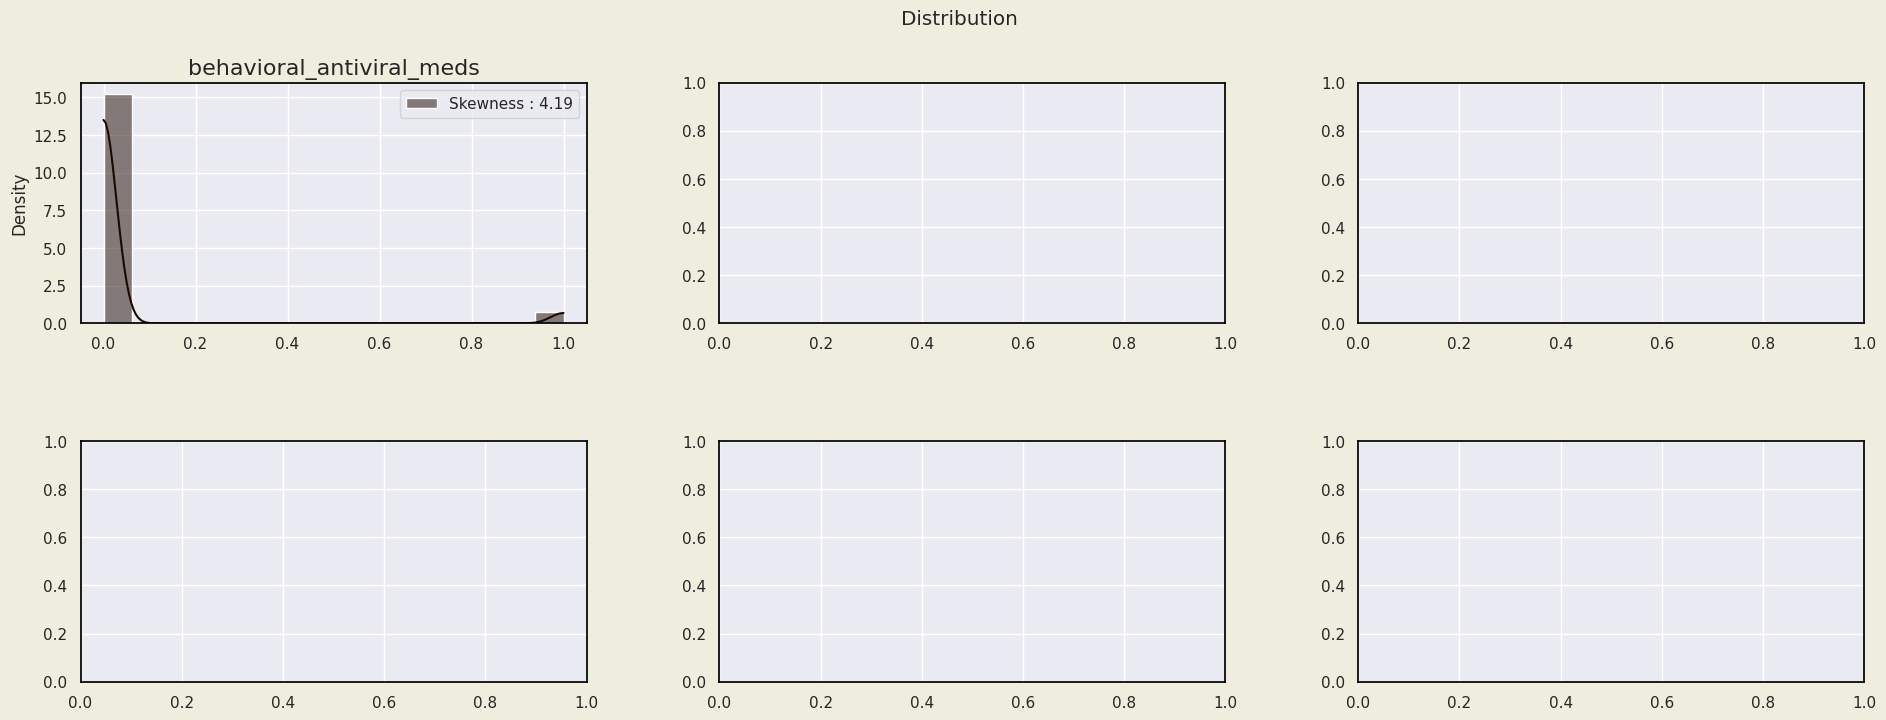

In [ ]:
fig, ax = plt.subplots(2,3,figsize = (20, 8))
fig.tight_layout(pad = 5)
fig.suptitle('Distribution')

sns.histplot(ax=ax[0,0],x = clean_df['behavioral_antiviral_meds'],stat='density',kde=True,label = "Skewness : %.2f"%(clean_df['behavioral_antiviral_meds'].skew()),color='#1C0A00').set_xlabel('')
ax[0,0].set_title('behavioral_antiviral_meds', fontsize = 16)
ax[0,0].legend(loc = 'best')

# sns.histplot(ax=ax[0,1],x = df2['Departure/Arrival time convenient'],stat='density',kde=True,label = "Skewness : %.2f"%(df2['Departure/Arrival time convenient'].skew()),color='#1C0A00').set_xlabel('')
# ax[0,1].set_title('Departure/Arrival time convenient', fontsize = 16)
# ax[0,1].legend(loc = 'best')

# sns.histplot(ax=ax[0,2],x = df2['Ease of Online booking'],stat='density',kde=True,label = "Skewness : %.2f"%(df2['Ease of Online booking'].skew()),color='#1C0A00').set_xlabel('')
# ax[0,2].set_title('Ease of Online booking', fontsize = 16)
# ax[0,2].legend(loc = 'best')

# sns.histplot(ax=ax[1,0],x = df2['Food and drink'],stat='density',kde=True,label = "Skewness : %.2f"%(df2['Food and drink'].skew()),color='#1C0A00').set_xlabel('')
# ax[1,0].set_title('Food and drink', fontsize = 16)
# ax[1,0].legend(loc = 'best')

# sns.histplot(ax=ax[1,1],x = df2['Online boarding'],stat='density',kde=True,label = "Skewness : %.2f"%(df2['Online boarding'].skew()),color='#1C0A00').set_xlabel('')
# ax[1,1].set_title('Online boarding', fontsize = 16)
# ax[1,1].legend(loc = 'best')

# sns.histplot(ax=ax[1,2],x = df2['Seat comfort'],stat='density',kde=True,label = "Skewness : %.2f"%(df2['Seat comfort'].skew()),color='#1C0A00').set_xlabel('')
# ax[1,2].set_title('Seat comfort', fontsize = 16)
# ax[1,2].legend(loc = 'best')

# plt.show()

### Korelasi antar kolom dengan target labels

In [ ]:
# data_corr = labels.copy()
# data_corr = data_corr.corr()['h1n1_vaccine'].sort_values(ascending=False)[1:]
# fig,ax = plt.subplots(1,figsize=(20,8))
# sns.barplot(y=data_corr.index,x=data_corr.values,ax=ax)
# plt.show()

In [ ]:
# data_corr = labels.copy()
# data_corr = data_corr.corr()['seasonal_vaccine'].sort_values(ascending=False)[1:]
# fig,ax = plt.subplots(1,figsize=(20,8))
# sns.barplot(y=data_corr.index,x=data_corr.values,ax=ax)
# plt.show()

## Modelling

Import model yang dibutuhkan

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

### Feature Engineering

#### Label Encoding Fitur Kategorikal

In [ ]:
LE = LabelEncoder()
for col in cat_cols:
  clean_df[col] = LE.fit_transform(clean_df[col])

In [ ]:
clean_df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age_group          26707 non-null  int64
 1   education          26707 non-null  int64
 2   race               26707 non-null  int64
 3   sex                26707 non-null  int64
 4   income_poverty     26707 non-null  int64
 5   marital_status     26707 non-null  int64
 6   rent_or_own        26707 non-null  int64
 7   employment_status  26707 non-null  int64
 8   hhs_geo_region     26707 non-null  int64
 9   census_msa         26707 non-null  int64
dtypes: int64(10)
memory usage: 2.2 MB


In [ ]:
num_df = clean_df.drop(cat_cols, axis=1)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(num_df)
standarized_data = pd.DataFrame(scaled_data, index = num_df.index, columns = num_df.columns)
print(standarized_data.shape)
standarized_data.head()

(26707, 22)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,-0.680609,-2.046928,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,1.403796,0.691971,-0.554462,...,-0.304756,-0.360462,-0.85061,-1.052050,-0.264426,-1.880954,-1.253366,-0.089516,-1.182177,-0.578667
1,1.520279,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,1.403796,0.691971,-0.554462,...,-0.304756,-0.360462,1.14936,1.298784,1.214180,-0.024126,-0.524309,1.426260,-1.182177,-0.578667
2,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,0.000000,...,-0.304756,-0.360462,-0.85061,-1.052050,-1.003729,-0.024126,-1.253366,-0.089516,1.484891,-0.578667
3,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,-1.452107,-0.554462,...,-0.304756,-0.360462,-0.85061,0.515173,1.953484,0.904289,0.933803,-0.847404,-1.182177,-0.578667
4,0.419835,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,0.691971,-0.554462,...,-0.304756,-0.360462,-0.85061,0.515173,-0.264426,-0.952540,-1.253366,1.426260,0.151357,-0.578667


In [ ]:
cat_cols_df = clean_df[cat_cols].reset_index(drop=True)

clean_df = pd.concat([standarized_data.reset_index(drop=True), cat_cols_df], axis=1)
print(clean_df.shape)
clean_df.head()

(26707, 32)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,-0.680609,-2.046928,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,1.403796,0.691971,-0.554462,...,3,1,3,0,2,1,0,1,8,2
1,1.520279,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,1.403796,0.691971,-0.554462,...,1,0,3,1,2,1,1,0,1,0
2,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,0.000000,...,0,2,3,1,0,1,0,0,9,0
3,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,-1.452107,-0.554462,...,4,0,3,0,2,1,1,1,5,1
4,0.419835,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,0.691971,-0.554462,...,2,3,3,0,0,0,0,0,9,0


#### Feature Importance

Memisahkan h1n1 dan seasonal

In [ ]:
y_h1n1 = labels['h1n1_vaccine']
y_seasonal = labels['seasonal_vaccine']

In [ ]:
# clean_df = clean_df.drop(['h1n1_vaccine', 'seasonal_vaccine','respondent_id'], axis = 1)
# clean_df = clean_df.drop(['race','child_under_6_months','opinion_seas_sick_from_vacc','household_adults','behavioral_antiviral_meds',
#                           'behavioral_large_gatherings','behavioral_outside_home','behavioral_antiviral_meds','marital_status',
#                           'behavioral_avoidance','behavioral_face_mask','income_poverty','employment_status',
#                           'education','census_msa'],axis=1)

##### Feature Importance dari H1N1

In [ ]:
# rfg = RandomForestRegressor()
# rfg.fit(X_h1n1, y_h1n1)

# feature_importance = pd.DataFrame(rfg.feature_importances_)
# feature_importance['label'] = X_h1n1.columns
# feature_importance.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

##### Feature Importance Seasonal

In [ ]:
# rfg = RandomForestRegressor()
# rfg.fit(X_seasonal, y_seasonal)

# feature_importance = pd.DataFrame(rfg.feature_importances_)
# feature_importance['label'] = X_seasonal.columns
# feature_importance.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

#### Feature Extraction

Pengelompokan Kolom berdasarkan Kebersihan

In [ ]:
clean_df['cleanliness'] =  clean_df['behavioral_antiviral_meds']+ clean_df['behavioral_avoidance']+\
                        clean_df['behavioral_face_mask']+clean_df['behavioral_wash_hands']+\
                       clean_df['behavioral_large_gatherings'] + clean_df['behavioral_outside_home']+\
                       clean_df['behavioral_touch_face']

In [ ]:
clean_df['cleanliness'].head()

respondent_id
0    2.0
1    4.0
2    1.0
3    3.0
4    4.0
Name: cleanliness, dtype: float64

Pengelompokan Kolom berdasarkan opini

In [ ]:
clean_df['opinion'] = clean_df['opinion_h1n1_vacc_effective'] + clean_df['opinion_h1n1_risk']+\
                  clean_df['opinion_h1n1_sick_from_vacc'] + clean_df['opinion_seas_vacc_effective']+\
                  clean_df['opinion_seas_risk'] + clean_df['opinion_seas_sick_from_vacc']

In [ ]:
clean_df['opinion'].head()

respondent_id
0    11.0
1    23.0
2    12.0
3    21.0
4    16.0
Name: opinion, dtype: float64

Pemisahan Opini berdasarkan vaksin

In [ ]:
clean_df['opinion_h1n1'] =  clean_df['opinion_h1n1_vacc_effective'] + clean_df['opinion_h1n1_risk']-clean_df['opinion_h1n1_sick_from_vacc']

clean_df['opinion_seasonal'] = clean_df['opinion_seas_vacc_effective'] +clean_df['opinion_seas_risk'] - clean_df['opinion_seas_sick_from_vacc'] 


Pengelompokan Fitur

In [ ]:
clean_df['good_concern'] = np.where(clean_df['h1n1_concern']>= 2,1,0)

clean_df['good_opinion_vacc'] = np.where(clean_df['opinion_h1n1_vacc_effective'] >= 4,1,0)

clean_df['good_knowledge'] = np.where(clean_df['h1n1_knowledge'] == 2,1,0)

clean_df['risk'] = np.where(clean_df['opinion_h1n1_risk'] >=  4,1,0)

clean_df['concern_knowledge'] = clean_df['h1n1_concern'] + clean_df['h1n1_knowledge']

clean_df['a^2'] = clean_df['age_group'] * clean_df['age_group']

#### Remove Feature Irrelevant

In [ ]:
clean_df.drop(['race','child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','household_adults','behavioral_antiviral_meds','behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds','marital_status',
           'behavioral_avoidance','behavioral_face_mask','income_poverty','hhs_geo_region','employment_status','education','census_msa','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face'],axis=1,inplace = True)
# clean_df = clean_df.select_dtypes(exclude=['int64'])

In [ ]:
X_h1n1 = clean_df
X_seasonal = clean_df
# X_seasonal = clean_df.drop(['opinion_h1n1_vacc_effective', 'h1n1_concern','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','h1n1_knowledge','doctor_recc_h1n1'], axis = 1)

### Model Selection

#### XGBoost 

In [ ]:
model_xg = XGBClassifier()

In [ ]:
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X_h1n1, y_h1n1, test_size=0.2, random_state=8)

In [ ]:
model_xg.fit(X_train_h1n1,y_train_h1n1)
pred_h1n1 = model_xg.predict(X_test_h1n1)
accuracy_h1n1 = roc_auc_score(y_test_h1n1,pred_h1n1)

In [ ]:
accuracy_h1n1*100

70.00807624697703

In [ ]:
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X_seasonal, y_seasonal, test_size=0.2, random_state=8)

In [ ]:
model_xg.fit(X_train_seasonal,y_train_seasonal)
pred_seasonal = model_xg.predict(X_test_seasonal)
accuracy_seasonal = roc_auc_score(y_test_seasonal,pred_seasonal)

In [ ]:
accuracy_seasonal*100

77.15984855443999

#### Catboost

In [ ]:
model_cb = CatBoostClassifier()

In [ ]:
model_cb.fit(X_train_h1n1,y_train_h1n1)
pred_h1n1 = model_cb.predict(X_test_h1n1)
accuracy_h1n1 = roc_auc_score(y_test_h1n1,pred_h1n1)

Learning rate set to 0.038082
0:	learn: 0.6666779	total: 22.1ms	remaining: 22.1s
1:	learn: 0.6416854	total: 44.4ms	remaining: 22.1s
2:	learn: 0.6199581	total: 65.6ms	remaining: 21.8s
3:	learn: 0.5993585	total: 87.8ms	remaining: 21.9s
4:	learn: 0.5822605	total: 113ms	remaining: 22.6s
5:	learn: 0.5651954	total: 137ms	remaining: 22.7s
6:	learn: 0.5496913	total: 159ms	remaining: 22.5s
7:	learn: 0.5357525	total: 193ms	remaining: 24s
8:	learn: 0.5243799	total: 220ms	remaining: 24.2s
9:	learn: 0.5131051	total: 244ms	remaining: 24.1s
10:	learn: 0.5023381	total: 267ms	remaining: 24s
11:	learn: 0.4929150	total: 291ms	remaining: 24s
12:	learn: 0.4845533	total: 311ms	remaining: 23.6s
13:	learn: 0.4766026	total: 332ms	remaining: 23.4s
14:	learn: 0.4689032	total: 357ms	remaining: 23.4s
15:	learn: 0.4621795	total: 379ms	remaining: 23.3s
16:	learn: 0.4559718	total: 412ms	remaining: 23.8s
17:	learn: 0.4504003	total: 436ms	remaining: 23.8s
18:	learn: 0.4452108	total: 460ms	remaining: 23.8s
19:	learn: 0.

In [ ]:
accuracy_h1n1*100

70.39173014612517

In [ ]:
model_cb.fit(X_train_seasonal,y_train_seasonal)
pred_seasonal = model_cb.predict(X_test_seasonal)
accuracy_seasonal = roc_auc_score(y_test_seasonal,pred_seasonal)

Learning rate set to 0.038082
0:	learn: 0.6785185	total: 8.8ms	remaining: 8.8s
1:	learn: 0.6645290	total: 17.4ms	remaining: 8.68s
2:	learn: 0.6507180	total: 27.4ms	remaining: 9.11s
3:	learn: 0.6384243	total: 35.9ms	remaining: 8.95s
4:	learn: 0.6280164	total: 45.6ms	remaining: 9.07s
5:	learn: 0.6171215	total: 63.4ms	remaining: 10.5s
6:	learn: 0.6078335	total: 72.2ms	remaining: 10.2s
7:	learn: 0.5990168	total: 80.6ms	remaining: 9.99s
8:	learn: 0.5911223	total: 89.6ms	remaining: 9.86s
9:	learn: 0.5837360	total: 97.7ms	remaining: 9.67s
10:	learn: 0.5777229	total: 108ms	remaining: 9.68s
11:	learn: 0.5715578	total: 117ms	remaining: 9.59s
12:	learn: 0.5659212	total: 125ms	remaining: 9.53s
13:	learn: 0.5607316	total: 136ms	remaining: 9.56s
14:	learn: 0.5557700	total: 148ms	remaining: 9.74s
15:	learn: 0.5509393	total: 159ms	remaining: 9.8s
16:	learn: 0.5468621	total: 168ms	remaining: 9.73s
17:	learn: 0.5425819	total: 177ms	remaining: 9.66s
18:	learn: 0.5389398	total: 185ms	remaining: 9.57s
19:	

In [ ]:
accuracy_seasonal*100

78.88242272068989

### Hyperparameter Tuning

#### GridSearchCV

##### H1N1

In [ ]:
pipe = Pipeline([('clf', DecisionTreeClassifier())])

In [ ]:
search = [{'clf': [XGBClassifier()],
                    'clf__learning_rate':[0.01,0.1,1],'clf__max_depth':[4,5,7], 'clf__n_estimators': [100, 300,500]},
                {'clf':[CatBoostClassifier()],
                    'clf__learning_rate':[0.01,0.1,1],'clf__max_depth':[4,5,7], 'clf__iterations': [300,500]},
                {'clf': [LogisticRegression()],
                 'clf__penalty': ['l1','l2'],
                 'clf__C': [0.1, 1, 10, 100],
                 'clf__solver': ['saga']}]

In [ ]:
cross_val = StratifiedKFold(n_splits = 3)
gs = GridSearchCV(pipe, search, cv = cross_val, return_train_score = True, verbose = 3, scoring ='roc_auc')

In [ ]:
gs.fit(X_train_h1n1,y_train_h1n1)

Streaming output truncated to the last 5000 lines.
34:	learn: 0.3592770	total: 321ms	remaining: 4.27s
35:	learn: 0.3582678	total: 330ms	remaining: 4.25s
36:	learn: 0.3572927	total: 338ms	remaining: 4.23s
37:	learn: 0.3564851	total: 346ms	remaining: 4.21s
38:	learn: 0.3555794	total: 355ms	remaining: 4.19s
39:	learn: 0.3548141	total: 363ms	remaining: 4.18s
40:	learn: 0.3540670	total: 372ms	remaining: 4.16s
41:	learn: 0.3532484	total: 387ms	remaining: 4.22s
42:	learn: 0.3523290	total: 396ms	remaining: 4.21s
43:	learn: 0.3515089	total: 404ms	remaining: 4.19s
44:	learn: 0.3507984	total: 414ms	remaining: 4.19s
45:	learn: 0.3498973	total: 424ms	remaining: 4.18s
46:	learn: 0.3490230	total: 432ms	remaining: 4.16s
47:	learn: 0.3483487	total: 439ms	remaining: 4.13s
48:	learn: 0.3476665	total: 447ms	remaining: 4.11s
49:	learn: 0.3470299	total: 455ms	remaining: 4.09s
50:	learn: 0.3462274	total: 462ms	remaining: 4.07s
51:	learn: 0.3455202	total: 470ms	remaining: 4.05s
52:	learn: 0.3446867	total: 479

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             param_grid=[{'clf': [XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None...
                          'clf__max_depth': [4, 5, 7],
                          'clf__n_estimators': [100, 300, 500]},
                         {'clf': [<catboost.core.CatBoostClassifier object at 0x7f992f79a710>],
                          'clf__iterations': [300, 500],
                          'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__max_depth': [4, 5, 7]},
                         {'clf': [LogisticRegression()],
                          'clf__C': [0.1, 1, 10, 100],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['saga']}],
             return_train_score=True, scoring='roc_auc', verbose=3)

In [ ]:
results = pd.DataFrame(gs.cv_results_)
results = results[['param_clf', 'params', 'mean_test_score', 'mean_train_score']].sort_values('mean_test_score', ascending=False)
results.head(50)

,param_clf,params,mean_test_score,mean_train_score
12,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.834625,0.895157
5,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.834282,0.867684
9,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.834231,0.868244
38,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.833503,0.873550
30,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.833292,0.878396
31,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.832387,0.905646
2,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.832313,0.850313
37,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.831741,0.844966
4,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.831650,0.851916
29,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.831449,0.857429


In [ ]:
gs.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

##### Seasonal

In [ ]:
pipe = Pipeline([('clf', DecisionTreeClassifier())])

In [ ]:
search = [{'clf': [XGBClassifier()],
                    'clf__learning_rate':[0.01,0.1,1],'clf__max_depth':[4,5,7], 'clf__n_estimators': [100, 300,500]},
                {'clf':[CatBoostClassifier()],
                    'clf__learning_rate':[0.01,0.1,1],'clf__max_depth':[4,5,7], 'clf__iterations': [300,500]},
                {'clf': [LogisticRegression()],
                 'clf__penalty': ['l1','l2'],
                 'clf__C': [0.1, 1, 10, 100],
                 'clf__solver': ['saga']}]

In [ ]:
cross_val = StratifiedKFold(n_splits = 3)
gs = GridSearchCV(pipe, search, cv = cross_val, return_train_score = True, verbose = 3, scoring ='roc_auc')

In [ ]:
gs.fit(X_train_seasonal,y_train_seasonal)

In [ ]:
results = pd.DataFrame(gs.cv_results_)
results = results[['param_clf', 'params', 'mean_test_score', 'mean_train_score']].sort_values('mean_test_score', ascending=False)
results.head(50)

In [ ]:
s_best = gs.best_params_
s_best

### Metode Oversampling SMOTE untuk H1N1

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=9, random_state=9)

In [ ]:
X_h1n1_smote, y_h1n1_smote = smote.fit_resample(X_train_h1n1,y_train_h1n1)

In [ ]:
# Mengecek apakah sudah di oversampling pada kolom yang bernilai lebih kecil
print(y_train_h1n1.value_counts())
print(y_h1n1_smote.value_counts())

0    16790
1     4575
Name: h1n1_vaccine, dtype: int64
0    16790
1    16790
Name: h1n1_vaccine, dtype: int64


In [ ]:
pipe = Pipeline([('clf', DecisionTreeClassifier())])

In [ ]:
search = [{'clf': [XGBClassifier()],
                    'clf__learning_rate':[0.01,0.1,1],'clf__max_depth':[4,5,7], 'clf__n_estimators': [100, 300,500]},
                {'clf':[CatBoostClassifier()],
                    'clf__learning_rate':[0.01,0.1,1],'clf__max_depth':[4,5,7], 'clf__iterations': [300,500]},
                {'clf': [LogisticRegression()],
                 'clf__penalty': ['l1','l2'],
                 'clf__C': [0.1, 1, 10, 100],
                 'clf__solver': ['saga']}]

In [ ]:
cross_val = StratifiedKFold(n_splits = 3)
gs = GridSearchCV(pipe, search, cv = cross_val, return_train_score = True, verbose = 3, scoring ='roc_auc')

In [ ]:
gs.fit(X_h1n1_smote,y_h1n1_smote)

Streaming output truncated to the last 5000 lines.
34:	learn: 0.3291358	total: 700ms	remaining: 9.3s
35:	learn: 0.3283578	total: 719ms	remaining: 9.27s
36:	learn: 0.3274363	total: 739ms	remaining: 9.24s
37:	learn: 0.3267140	total: 769ms	remaining: 9.34s
38:	learn: 0.3256529	total: 787ms	remaining: 9.3s
39:	learn: 0.3248323	total: 806ms	remaining: 9.27s
40:	learn: 0.3240393	total: 825ms	remaining: 9.23s
41:	learn: 0.3226429	total: 844ms	remaining: 9.2s
42:	learn: 0.3218453	total: 863ms	remaining: 9.17s
43:	learn: 0.3209564	total: 890ms	remaining: 9.23s
44:	learn: 0.3197904	total: 909ms	remaining: 9.19s
45:	learn: 0.3186612	total: 928ms	remaining: 9.16s
46:	learn: 0.3179197	total: 947ms	remaining: 9.13s
47:	learn: 0.3173695	total: 967ms	remaining: 9.11s
48:	learn: 0.3167110	total: 986ms	remaining: 9.07s
49:	learn: 0.3161649	total: 1s	remaining: 9.04s
50:	learn: 0.3153455	total: 1.02s	remaining: 9.01s
51:	learn: 0.3143538	total: 1.04s	remaining: 8.99s
52:	learn: 0.3137043	total: 1.06s	rem

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             param_grid=[{'clf': [XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None...
                          'clf__max_depth': [4, 5, 7],
                          'clf__n_estimators': [100, 300, 500]},
                         {'clf': [<catboost.core.CatBoostClassifier object at 0x7f992f81d180>],
                          'clf__iterations': [300, 500],
                          'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__max_depth': [4, 5, 7]},
                         {'clf': [LogisticRegression()],
                          'clf__C': [0.1, 1, 10, 100],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['saga']}],
             return_train_score=True, scoring='roc_auc', verbose=3)

In [ ]:
results = pd.DataFrame(gs.cv_results_)
results = results[['param_clf', 'params', 'mean_test_score', 'mean_train_score']].sort_values('mean_test_score', ascending=False)
results.head(50)

,param_clf,params,mean_test_score,mean_train_score
8,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.946723,0.966277
15,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.944430,0.978012
7,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.943877,0.957773
5,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.943629,0.956076
9,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.943407,0.958841
12,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.943184,0.963550
29,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.942546,0.954300
28,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.941992,0.950365
38,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.941886,0.958782
37,<catboost.core.CatBoostClassifier object at 0x...,{'clf': <catboost.core.CatBoostClassifier obje...,0.941737,0.953599


In [ ]:
gs.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

### Final

#### Transform Data Train

In [ ]:
def transform_test(Test_X):
    Test_X.drop(['employment_industry','employment_occupation'],axis=1,inplace = True)

    # All the NULL values are populated with the mode
            
    d = Test_X
    str_cols = d.select_dtypes(include = 'object').columns

    ### LabelEcoding all categorical types ####
    from sklearn.preprocessing import LabelEncoder
    LE = LabelEncoder()
    for col in Test_X.columns:
        if Test_X[col].isnull().sum() and Test_X[col].dtypes != 'object':
            Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].median()
    for col in Test_X.columns:
        if Test_X[col].isnull().sum() and Test_X[col].dtypes == 'object':
            Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].mode().max()
    LE = LabelEncoder()
    for col in str_cols:
        Test_X[col] = LE.fit_transform(Test_X[col]) # Converts to int64

    return Test_X

In [ ]:
test = transform_test(test)

<ipython-input-66-9fdfa7f83885>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].median()
<ipython-input-66-9fdfa7f83885>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].median()
<ipython-input-66-9fdfa7f83885>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].median()
<ipy

#### Train Dengan Parameter Terbaik

In [ ]:
best_param = gs.best_params_
best_param

{'clf': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'clf__learning_rate': 0.01,
 'clf__max_depth': 7,
 'clf__n_estimators': 500}

In [ ]:
# best_model = CatBoostClassifier(learning_rate=best_param['clf__learning_rate'], max_depth=best_param['clf__max_depth'], iterations=best_param['clf__iterations'])
best_model = XGBClassifier(learning_rate=best_param['clf__learning_rate'], max_depth=best_param['clf__max_depth'], iterations=best_param['clf__n_estimators'])

In [ ]:
# model_xg.fit(clean_df, labels.h1n1_vaccine)
X_clean_smote, y_labels_smote = smote.fit_resample(clean_df, labels.h1n1_vaccine)
best_model.fit(X_clean_smote, y_labels_smote)
final_h1n1 = best_model.predict(test)

[05:09:22] WARNING: ../src/learner.cc:767: 
Parameters: { "iterations" } are not used.



Best Model untuk seasonal

In [ ]:
best_seas = s_best
best_seas

{'clf': <catboost.core.CatBoostClassifier at 0x7f992f59f010>,
 'clf__iterations': 300,
 'clf__learning_rate': 0.1,
 'clf__max_depth': 4}

In [ ]:
best_model_seasonal = CatBoostClassifier(learning_rate=best_seas['clf__learning_rate'], max_depth=best_seas['clf__max_depth'], iterations=best_seas['clf__iterations'])

In [ ]:
# model_xg.fit(clean_df, labels.seasonal_vaccine)
best_model_seasonal.fit(clean_df, labels.seasonal_vaccine)
final_seasonal = best_model_seasonal.predict(test)

0:	learn: 0.6566411	total: 7.09ms	remaining: 2.12s
1:	learn: 0.6302757	total: 14.4ms	remaining: 2.14s
2:	learn: 0.6072228	total: 20.9ms	remaining: 2.06s
3:	learn: 0.5895521	total: 27.6ms	remaining: 2.04s
4:	learn: 0.5744897	total: 34ms	remaining: 2.01s
5:	learn: 0.5636055	total: 40.3ms	remaining: 1.97s
6:	learn: 0.5524855	total: 47ms	remaining: 1.97s
7:	learn: 0.5433715	total: 53.7ms	remaining: 1.96s
8:	learn: 0.5363134	total: 60.1ms	remaining: 1.94s
9:	learn: 0.5310058	total: 66.6ms	remaining: 1.93s
10:	learn: 0.5254846	total: 73.1ms	remaining: 1.92s
11:	learn: 0.5208787	total: 80ms	remaining: 1.92s
12:	learn: 0.5171143	total: 87ms	remaining: 1.92s
13:	learn: 0.5134332	total: 93.7ms	remaining: 1.91s
14:	learn: 0.5101131	total: 100ms	remaining: 1.9s
15:	learn: 0.5069351	total: 107ms	remaining: 1.89s
16:	learn: 0.5042465	total: 113ms	remaining: 1.89s
17:	learn: 0.5022644	total: 120ms	remaining: 1.88s
18:	learn: 0.4999771	total: 127ms	remaining: 1.88s
19:	learn: 0.4981476	total: 134ms	re

In [ ]:
submission_df = pd.read_csv('/content/gdrive/My Drive/dac-find-it-2023/submission_format.csv', 
                            index_col="respondent_id")
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = final_h1n1
submission_df["seasonal_vaccine"] = final_seasonal

submission_df

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0,0
26708,0,0
26709,1,1
26710,1,1
26711,0,0
...,...,...
53410,1,0
53411,0,0
53412,0,0


In [ ]:
submission_df.to_csv('/content/gdrive/My Drive/dac-find-it-2023/submission.csv',index = True)